# Forecasting - Exam Assignment

Coded by: **Jorge Polanco**

In [1]:
#install.packages("tabulizer")
#install.packages("XLConnect")
#install.packages('lmtest')

In [1]:
# Importing libraries
library(XLConnect)
library(tabulizer)
library(lubridate)
library(parallel)
library(tseries)
library(readxl)
library(portes)
library(lmtest)
library(dplyr)
library(fpp2)

Warning message:
"package 'XLConnect' was built under R version 3.6.3"
XLConnect 1.0.1 by Mirai Solutions GmbH [aut],
  Martin Studer [cre],
  The Apache Software Foundation [ctb, cph] (Apache POI),
  Graph Builder [ctb, cph] (Curvesapi Java library)

http://www.mirai-solutions.com
https://github.com/miraisolutions/xlconnect

Warning message:
"package 'tabulizer' was built under R version 3.6.3"

Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date


Warning message:
"package 'tseries' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'readxl' was built under R version 3.6.3"
Warning message:
"package 'portes' was built under R version 3.6.3"
Loading required package: forecast

Warning message:
"package 'forecast' was built under R version 3.6.3"
Warning message:
"package 'lmtest' was built under R version 3.6.3"
Loading required package:

**Preparing the datasets:**

In [2]:
# Declaring my working directory
setwd("C:/Users/jpolancoroque/Desktop/IESEG/02. Second Semester/Forecasting/Exam")

In [3]:
# Knowing my excel file
importWorksheets = function(filename) {
    workbook = loadWorkbook(filename)
    sheet_names = getSheets(workbook)
    names(sheet_names) = sheet_names
    sheet_list = lapply(sheet_names, function(.sheet){
        readWorksheet(object=workbook, .sheet)})
}

In [4]:
# Importing database and the names of the excel sheet
data = importWorksheets('DataSets2020 v2.xlsx')

In [5]:
# Selecting Turnover database
Turnover_db = ts(data$Turnover, frequency = 12, start = 2000)
Turnover_db = Turnover_db[,2]

In [6]:
# Turnover database in "Time Series" format
Turnover_db

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,43.06,50.01,60.52,56.07,69.35,71.09,60.40,67.78,64.27,61.39,58.37,58.95
2001,54.29,52.83,63.68,62.21,74.90,72.40,72.91,73.10,58.03,65.15,60.86,55.51
2002,54.61,54.83,62.90,68.20,69.40,69.51,71.53,68.61,63.95,64.65,57.14,62.76
2003,59.25,55.61,66.65,72.51,70.11,82.28,81.48,78.44,69.86,71.20,61.91,70.40
2004,59.64,60.76,80.50,71.94,77.77,89.13,75.52,79.91,75.08,67.18,69.34,69.74
2005,59.66,62.82,81.16,79.88,84.95,95.87,81.86,78.83,82.23,73.61,76.74,74.92
2006,64.54,66.08,79.51,76.46,84.34,95.39,89.55,84.15,76.86,80.61,73.85,76.20
2007,70.55,68.06,86.22,86.58,93.11,96.70,83.46,85.89,79.11,84.49,77.50,79.41
2008,77.26,70.76,82.09,87.67,94.31,86.38,96.28,86.71,83.91,83.96,74.54,87.83
2009,67.38,71.70,86.10,87.07,88.56,103.22,94.75,84.60,88.83,80.40,78.85,86.08


-----------------------------------------------------------------------------------------------------

# Exercise 1

## 1) Explore the data using relevant graphs, and discuss the properties of the data.

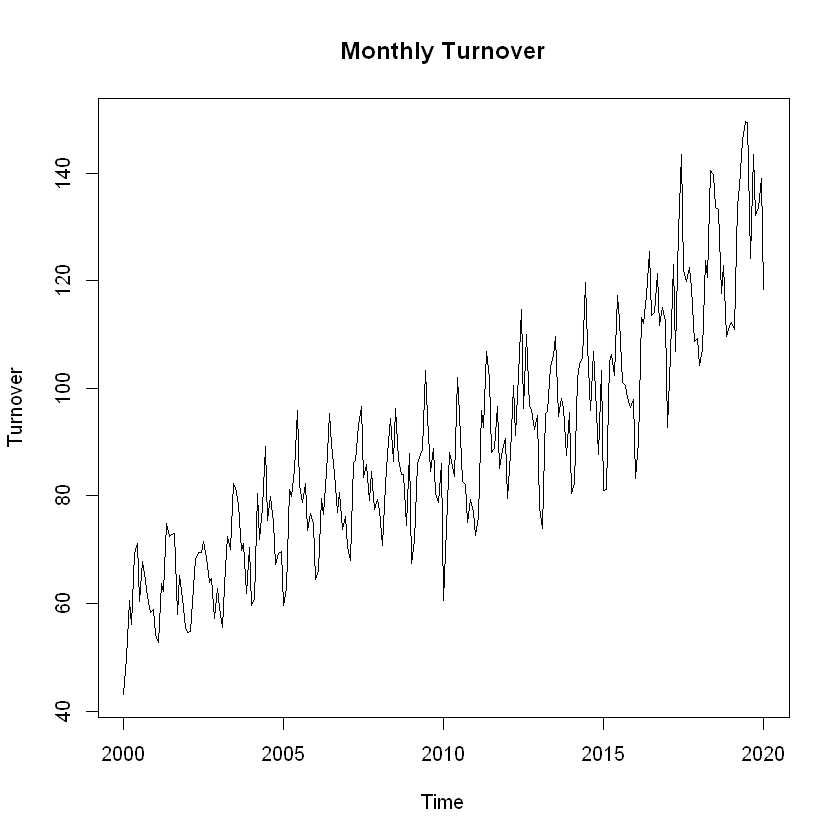

In [7]:
# Plotting the original data
plot(Turnover_db, main = 'Monthly Turnover', ylab = 'Turnover')

**By looking at the Turnover time series, we can see there is a positive trend and an apparently seasonal process. However, all these insights will be confirm through statistical test. Also, we can say that there are some possible outliers that should be treated through some smoothing method.**

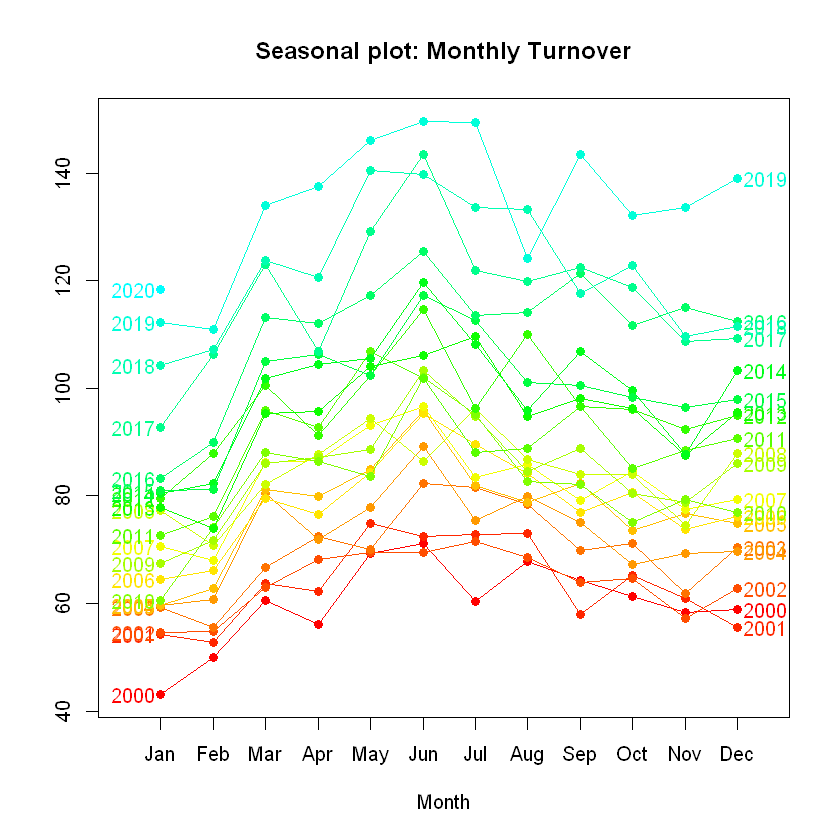

In [8]:
# Seasonal Plot
seasonplot(Turnover_db, year.labels=TRUE, year.labels.left=TRUE, pch=19, col=rainbow(40), main='Seasonal plot: Monthly Turnover')

**As previously mentioned, here we can see clearly the positive trend and the seasonal pattern in a clear way.**

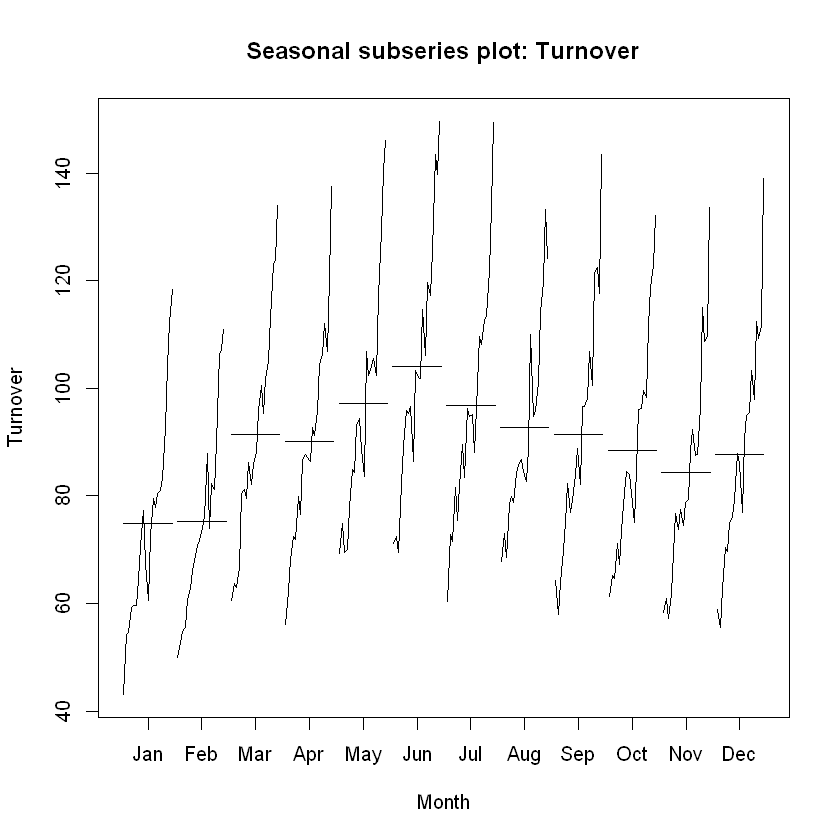

In [9]:
# Avg turnover by month
monthplot(Turnover_db, type="l", main="Seasonal subseries plot: Turnover", ylab="Turnover", xlab="Month", xaxt="n")
axis(1,at=1:12, labels=month.abb, cex=1)

**In this graph, we can see in a compact way the average turnover by month.**

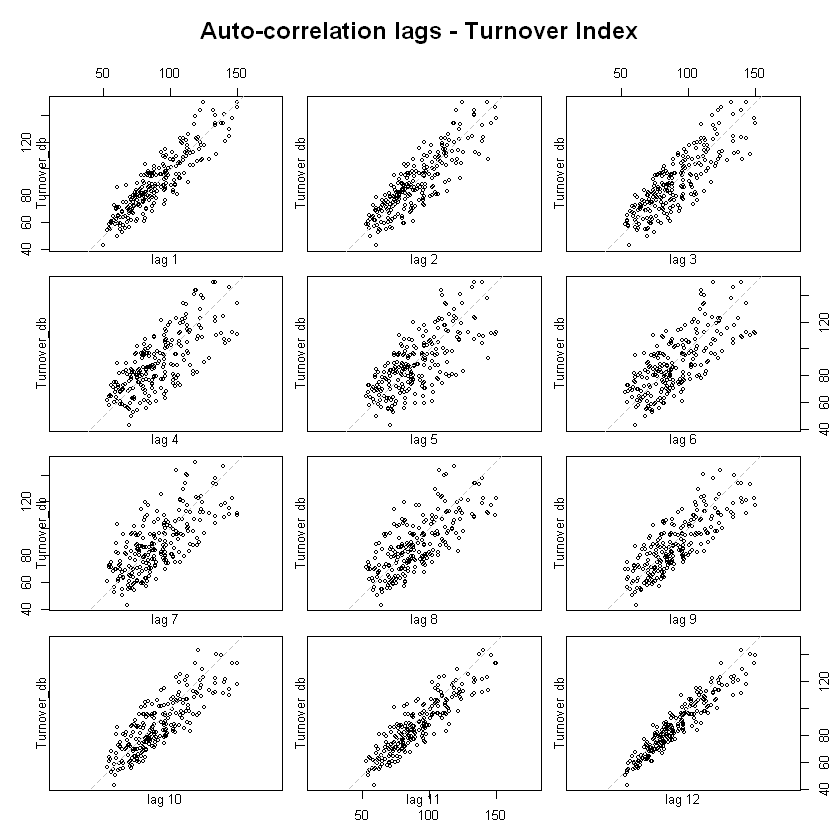

In [10]:
# Plotting lag correlations
lag.plot(Turnover_db, lags=12, do.lines=FALSE, main='Auto-correlation lags - Turnover Index')

**There is correlated data with the lag 12 because we have an important monthly seasonal pattern.**

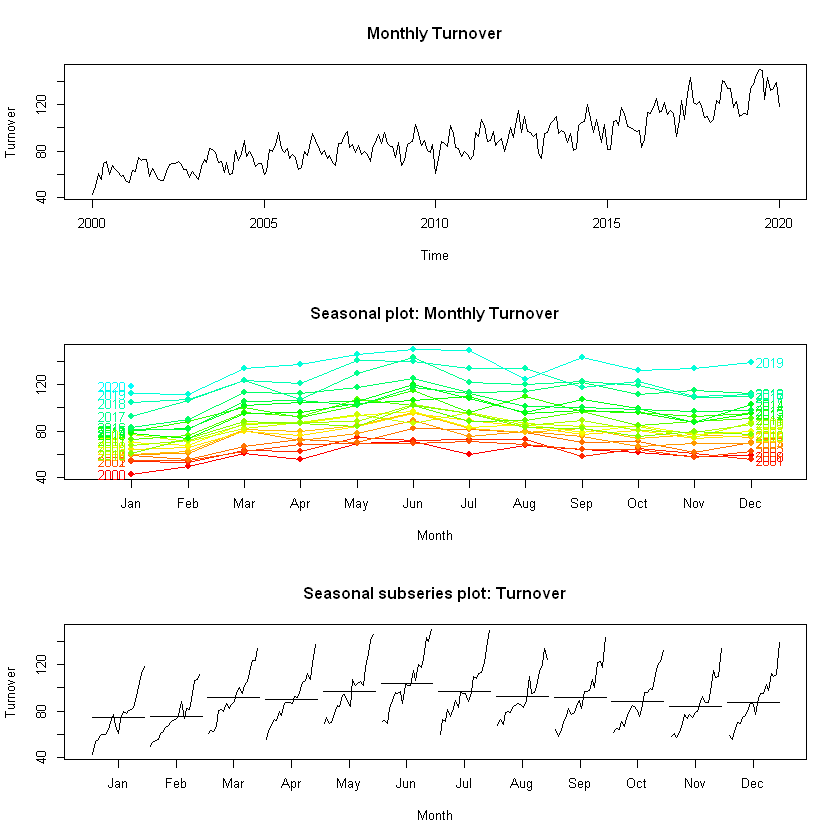

In [11]:
par(mfrow=c(3,1))
plot(Turnover_db, main = 'Monthly Turnover', ylab = 'Turnover')
seasonplot(Turnover_db, year.labels=TRUE, year.labels.left=TRUE, pch=19, col=rainbow(40), main='Seasonal plot: Monthly Turnover')
monthplot(Turnover_db, type="l", main="Seasonal subseries plot: Turnover", ylab="Turnover", xlab="Month", xaxt="n")
axis(1,at=1:12, labels=month.abb, cex=1)

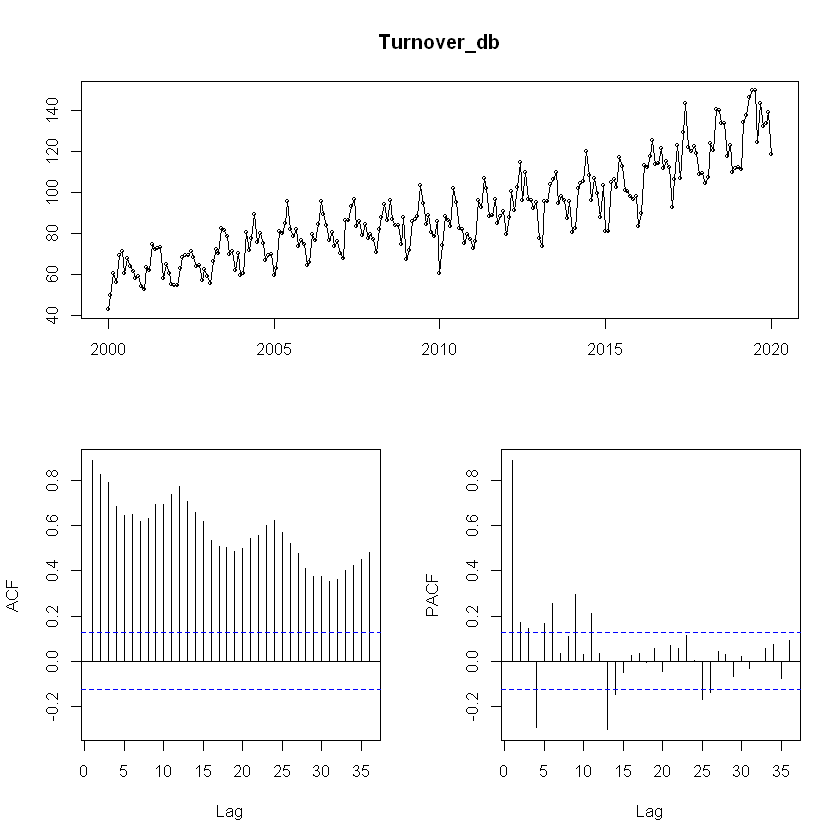

In [12]:
# Auto-correlation function and Partial Auto-correlation function
tsdisplay(Turnover_db)

**All the lags are significant. It seems that every 12 lags we have a stronger correlationship. Also, the fact the lines are always too high means that there is a upward trend. This graphics will be very helpful in the construction of our models, so we will discuss this topic in following sections. By now, it is important to say that it seems we should use a smoothing method in order to get a white noise time serie; otherwise, some model assumptions could be violeted.**

-----------------------------------------------------------------------------------------------------

## 2) Discuss whether a transformation of the data would be useful. If so, select the most appropriate transformation.

In [13]:
# Searching the optimal lambda
lambda_bc = BoxCox.lambda(Turnover_db)
lambda_bc

[1] 0.229091

In [14]:
# Using a Log transformation over my original series
transformed_turnover = BoxCox(Turnover_db,lambda=lambda_bc)

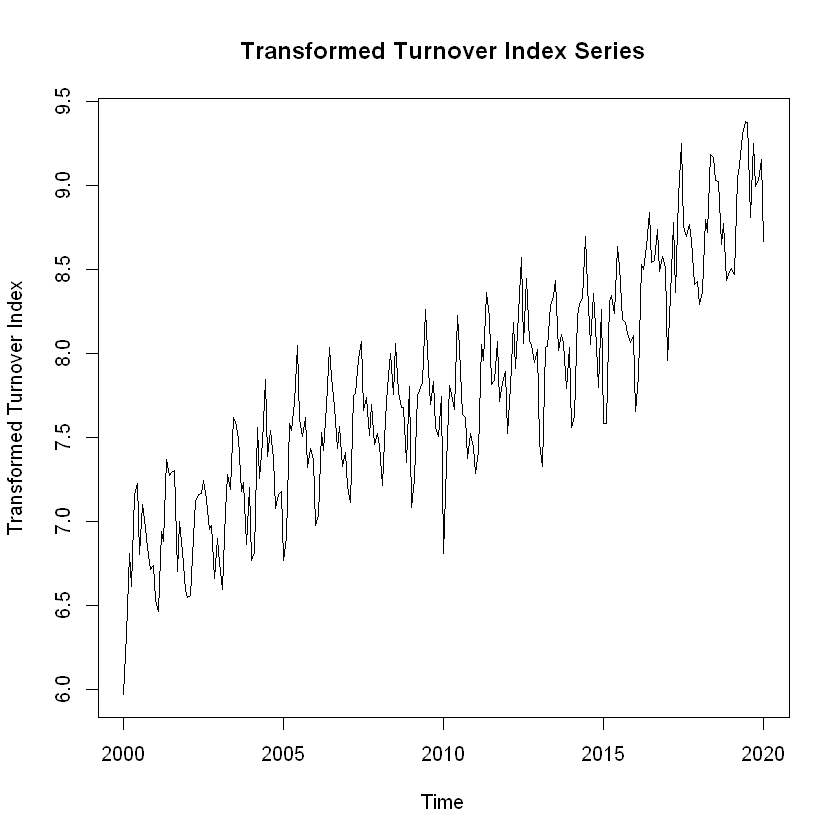

In [15]:
# Plotting a more smooth version of my series
plot(transformed_turnover, ylab='Transformed Turnover Index', main='Transformed Turnover Index Series')

**Using the BoxCox function, we can get an optimal lambda to transform my series.**

In [16]:
# Augmented Dicky-Fuller Test
adf.test(transformed_turnover, alternative = "stationary")

Warning message in adf.test(transformed_turnover, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  transformed_turnover
Dickey-Fuller = -7.4207, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


**Moreover, through the ADF test, we can see that this time serie is stationary; therefore, this will be specially appropiate for ARIMA models.**

-----------------------------------------------------------------------------------------------------

## 3) Create forecasts using the seasonal naive method. Check the residual diagnostics and the forecast accuracy.

In [17]:
# Dividing the dataset and fitting the training set
training_set = window(Turnover_db, end=c(2015,12))
test_set = window(Turnover_db,start=c(2016,1))
fit_sn = snaive(training_set,h=length(test_set), lambda=lambda_bc)

In [18]:
# Cost function of training and test set
accuracy(fit_sn,test_set)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,2.659611,6.612143,5.158722,3.09471,6.23105,1.000000,0.04369396,NA
Test set,21.338367,24.051192,21.338367,17.11021,17.11021,4.136367,0.52611586,1.926643


**By looking at this cost function performance, it seems that there is chance to reduce the gap between the training set and the test set.**

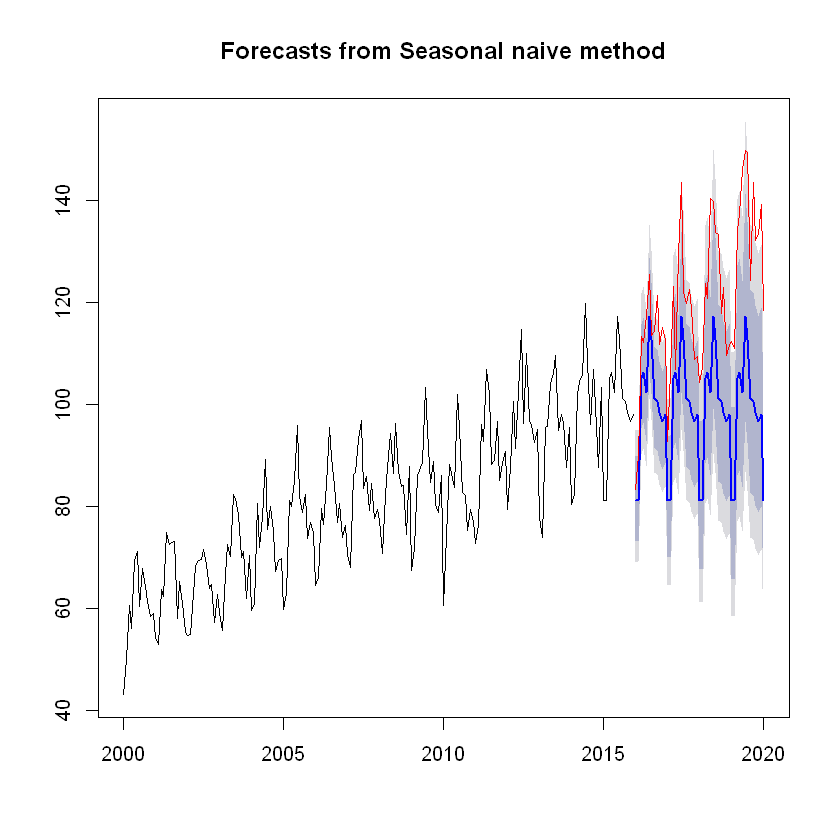

In [19]:
# Plotting predictions
plot(fit_sn)
lines(test_set, col='red')

**The gray zone shows the forecast with up a 95% of confidence level. The forecast presented with the blue line is the average of all the point in each period.**


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 72.938, df = 24, p-value = 7.78e-07

Model df: 0.   Total lags used: 24



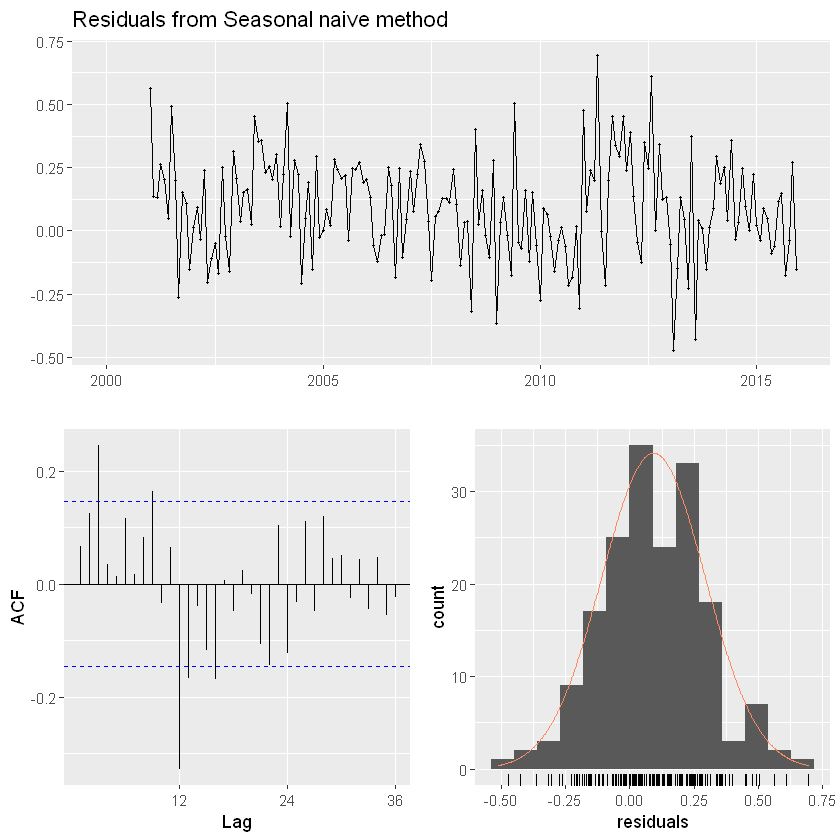

In [20]:
# Ljung-Box test for the forecast series
checkresiduals(fit_sn)

**According to the Ljung-Box test, with a 99% of confidence level we can reject our null hypothesis, which means that there is no white process in my forecast series. Considering the latter, we can say that the time series can be predicted, but we are able to improve our model.**

-----------------------------------------------------------------------------------------------------

## 4) Use an STL decomposition to forecast the turnover index. Use the appropriate underlying methods to do so. Check the residual diagnostics and the forecast accuracy.

**a) Original Serie:**

In [21]:
# Trend-Cycle Component
turnover_stl = stl(Turnover_db, t.window=15,s.window="periodic", robust = TRUE)

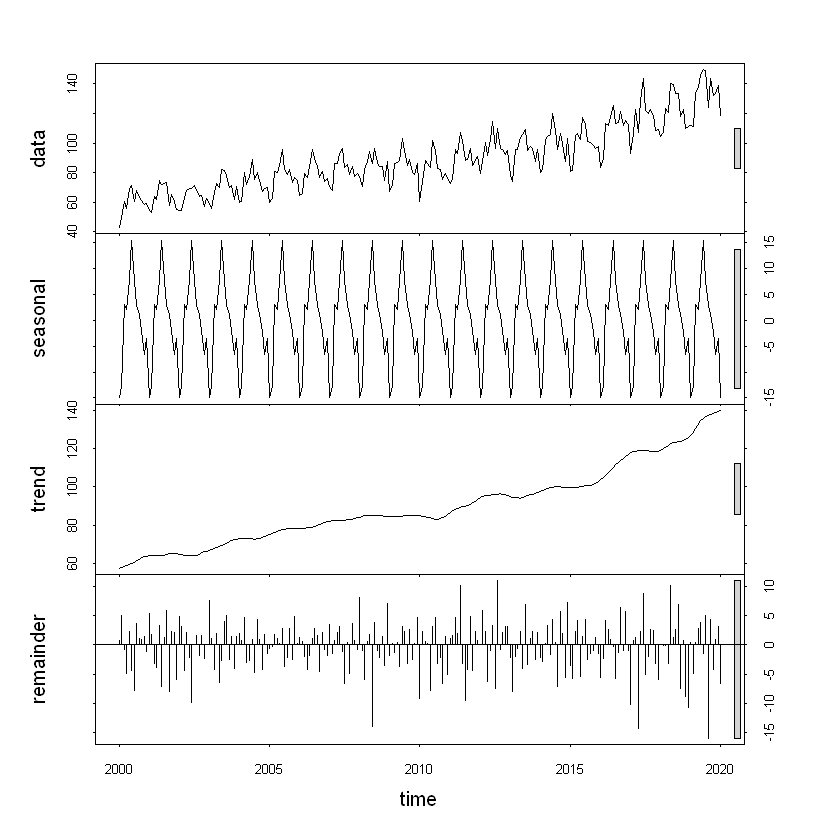

In [22]:
# STL decomposition
plot(turnover_stl)

**We can start decomposing the original time series in order to identify the seasonal, trend and error pattern. Also,as we can see in the 'remainder' section, there is many more information we are not considering in the time series.**

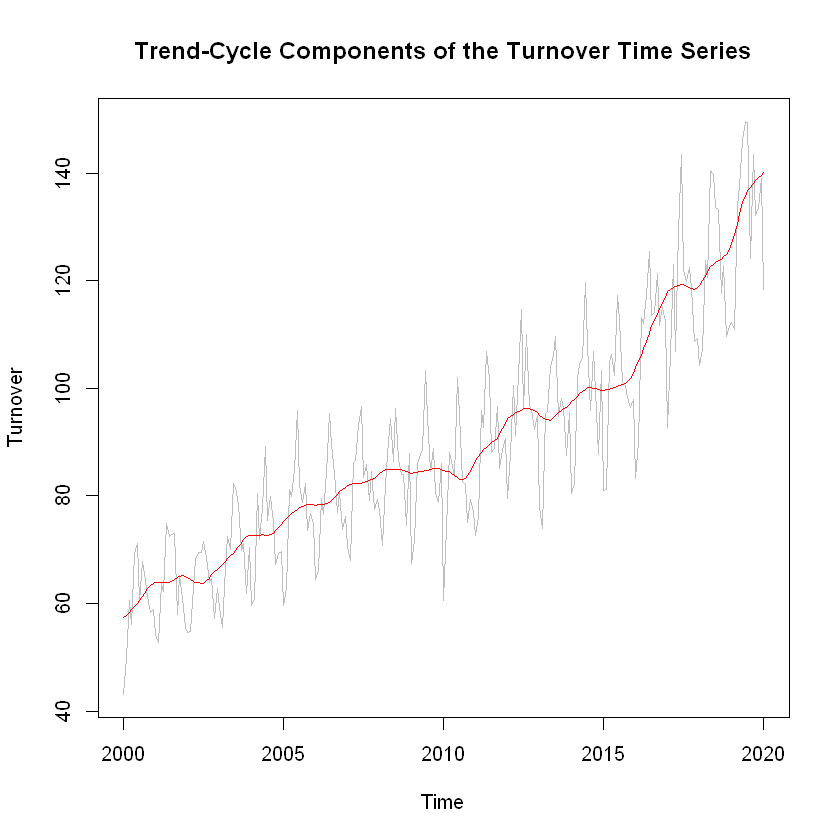

In [23]:
# Trend Pattern
plot(Turnover_db, col="gray", main="Trend-Cycle Components of the Turnover Time Series", ylab="Turnover")
lines(turnover_stl$time.series[,2],col="red")

**In this graph, we are only showing the positive trend across the whole serie. It seems that the slope of the trend presented two phases, the 2000-2010 trend has a lower slope than the period 2010-2020.**

In [ ]:
# Seasonal adjustment
plot(Turnover_db, col="gray", main="Seasonal-Cycle Components of the Turnover Time Series", ylab="Turnover")
lines(seasadj(turnover_stl),col="red")

**In this chart we are adjusting the seasonal pattern.**

**b) Multiplicative and Adjusted Serie:**

In [ ]:
# Multiplicative decomposition process
turnover_stl_multiplicative = decompose(Turnover_db, type="multiplicative")
plot(turnover_stl_multiplicative)

**Through the multiplicative method, here we are trying to smooth the series. The multiplicative Smoothing selection was based on how the change in the seasonal looks like.**

In [ ]:
# Seasonal adjustment with seasonal adjustment
seasAdj = seasadj(turnover_stl_multiplicative)
plot(Turnover_db,col="gray", main="Trend-Cycle Components of the Turnover Time Series with seasonal adj", ylab="Turnover")
lines(seasAdj, col='red')

**From this new series, we will run different model versions in order to find a good one.**

In [ ]:
# Random walk with drift forecasts of the seasonally adjusted data
fit = stl(Turnover_db, s.window="periodic")
fcast = forecast(fit, method="rwdrift", h=24)

# Fitting the model
pl_adj = seasadj(fit)
rwf_adj = rwf(pl_adj, h=24, drift = TRUE, lambda=lambda_bc)
plot(rwf_adj)

# Original data
lines(Turnover_db, col="red")

# Mean of the forecast
lines(fcast$mean, col="green")

In [ ]:
# Dividing the dataset and fitting the training set
training_set = window(pl_adj, end=c(2015,12))
test_set = window(pl_adj,start=c(2016,1))
fit_stl = rwf(training_set, h=length(test_set), drift = TRUE, lambda=lambda_bc)

# Cost function of training and test set
accuracy(fit_stl,test_set)

**By comparing the MASE, we can see that Cost Function is lower in this model than the Seasonal Naive one (more than 2 times lower!).**

In [ ]:
# Plotting predictions
plot(fit_stl)
lines(test_set, col='red')

**The gray zone shows the forecast with up a 95% of confidence level. The forecast presented with the blue line is the average of all the point in each period.**

In [ ]:
checkresiduals(fit_stl)

**According to the Ljung-Box test, with a 99% of confidence level we can reject our null hypothesis, which means that there is no white process in my forecast series. Considering the latter, we can say that the time series can be predicted, but we are able to improve our model.**

-----------------------------------------------------------------------------------------------------

## 5) Generate forecasts using Holt-Winters’ method. Check the residual diagnostics and the forecast accuracy.

In [ ]:
# Identifying potential models (using the whole serie): Damped Holt's vs Holt's
turnover = window(Turnover_db,start=2000)

fit_holt_damped = holt(turnover, damped = TRUE, phi=0.8,h=12,lambda=lambda_bc, seasonal='multiplicative')
fit_holt = holt(turnover, h=12,lambda=lambda_bc, seasonal='multiplicative')

par(mfrow=c(2,1))
plot(fit_holt_damped)
plot(fit_holt)

**Looking at the three different options, it seems that it makes more sense rooting for the Holt's with no damping.**

In [ ]:
# Using a transformation for the modeling
training_set = window(Turnover_db, end=c(2015,12))
test_set = window(Turnover_db,start=c(2016,1))

fit_dhm = holt(training_set, damped = TRUE,h=length(test_set),lambda=lambda_bc, seasonal='multiplicative')
fit_holt = holt(training_set, damped = FALSE, h=length(test_set),lambda=lambda_bc, seasonal='multiplicative')

In [ ]:
fit_dhm$model
fit_holt$model

**Interpreting the coefficients we can say the following:**
* a high alfa tells us that the last observation has an important weight 
* a beta near to zero value tells us that there is a constante trend 
* a phi around one value tells us there is no damoing.

In [ ]:
# Cost function of training and test set
accuracy(fit_dhm,test_set)

In [ ]:
# Cost function of training and test set
accuracy(fit_holt,test_set)

**Comparing the MASE metrics, the Damped Holt's vs the Holt's, we should stick up with the Holt's. The latter is aligned with what we saw in the previous charts.**

In [ ]:
# Plotting the Holt's model
plot(fit_holt)
lines(test_set, col='red')

**In this case, it seems that the version with no damping reduce our cost function.**

In [ ]:
checkresiduals(fit_holt)

**According to the Ljung-Box test, with a 99% of confidence level we can reject our null hypothesis, which means that there is no white process in my forecast series. Considering the latter, we can say that the time series can be predicted, but we are able to improve our model.**

-----------------------------------------------------------------------------------------------------

## 6) Generate forecasts using ETS. First select the appropriate model(s) yourself and discuss their performance. Compare these models with the results of the automated ETS procedure. Check the residual diagnostics and the forecast accuracy for the various ETS models you’ve considered.

In [ ]:
# Training and Test set
training_set = window(Turnover_db, end=c(2015,12))
test_set = window(Turnover_db,start=c(2016,1))

In [ ]:
# We are going to run the folllowing models
models_ets = c('ANN','AAN',
               'ANA','AAA',
               'MNN','MAN',
               'MNA','MAA',
               'MNM','MAM')

In [ ]:
# Declaring empty matrix
matrix_ets = matrix(data=NA, nrow=10, ncol=2)

In [ ]:
# Building the model
for (i in 1:10){
    model = ets(training_set, model=models_ets[i], damped=FALSE)
    fcast = forecast(model,h=length(test_set))
    accuracy = accuracy(fcast, test_set)
    matrix_ets[i,1] = model$aicc
    matrix_ets[i,2] = accuracy[2,6]
}

rownames(matrix_ets) = models_ets
colnames(matrix_ets) = c("AICc","MASE")

In [ ]:
# MAM model is the best one
min(matrix_ets[,2])

In [ ]:
matrix_ets

In [ ]:
model_MAM = ets(training_set, model="MAM", damped=FALSE)
fcast_MAM = forecast(model,h=length(test_set))
accuracy(fcast_MAM, test_set)

In [ ]:
# Plotting ETS(M,A,M)
plot(model_MAM)

**The best model is a Holt's Linear method with a multiplicative error process, which presets the min MASE value out of the 10 models we have got.**

In [ ]:
checkresiduals(model_MAM)

**According to the Ljung-Box test, with a 99% of confidence level we can reject our null hypothesis, which means that there is no white process in my forecast series. Considering the latter, we can say that the time series can be predicted, but we are able to improve our model.**

-----------------------------------------------------------------------------------------------------

## 7) Generate forecasts using ARIMA. First select the appropriate model(s) yourself and discuss their performance. Compare these models with the results of the auto.arima procedure. Check the residual diagnostics and the forecast accuracy for the ARIMA models you’ve considered.

**a) Auto Arima:**

In [47]:
# Training my model
training_set = window(Turnover_db, end=c(2015,12))
test_set = window(Turnover_db,start=c(2016,1))
fit_arima= auto.arima(training_set, seasonal=TRUE, approximation=FALSE, stepwise=FALSE, lambda=lambda_bc)

In [48]:
summary(fit_arima)

Series: training_set 
ARIMA(3,0,0)(2,1,0)[12] with drift 
Box Cox transformation: lambda= 0.229091 

Coefficients:
          ar1     ar2     ar3     sar1     sar2   drift
      -0.0069  0.1327  0.3962  -0.5771  -0.3306  0.0078
s.e.   0.0702  0.0693  0.0734   0.0751   0.0714  0.0012

sigma^2 estimated as 0.02816:  log likelihood=66.06
AIC=-118.12   AICc=-117.47   BIC=-95.77

Training set error measures:
                      ME     RMSE      MAE        MPE     MAPE      MASE
Training set -0.01894455 4.868234 3.601214 -0.1588641 4.353349 0.6980825
                    ACF1
Training set -0.02033757


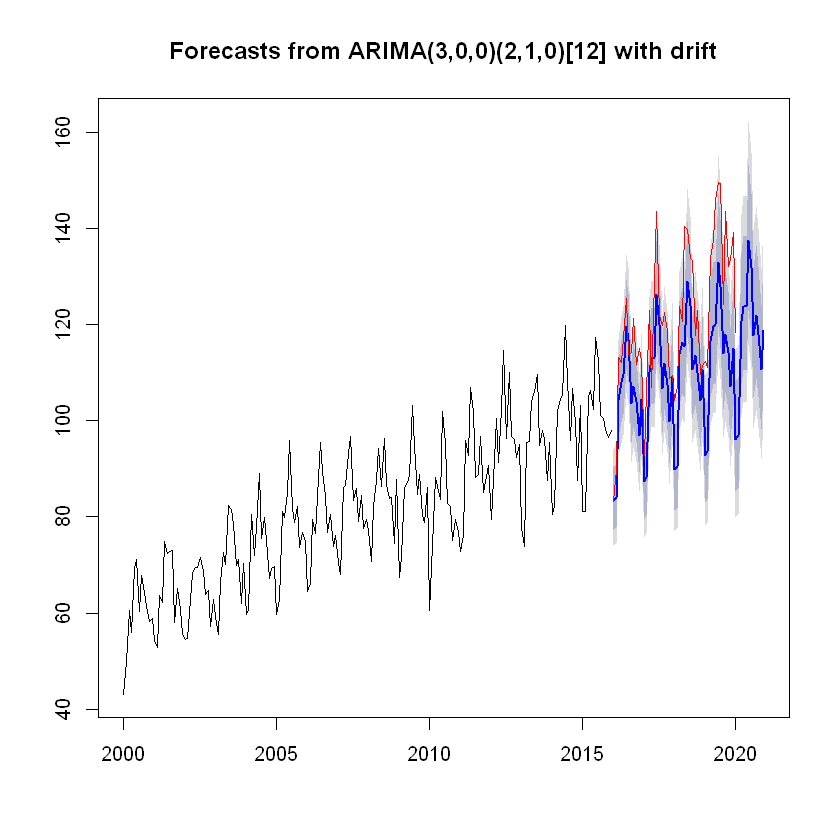

In [49]:
fcast_arima = forecast(fit_arima,h=60)
plot(fcast_arima)
lines(test_set, col="red")

In [50]:
auto_arima = accuracy(fcast_arima,test_set)
auto_arima

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01894455,4.868234,3.601214,-0.1588641,4.353349,0.6980825,-0.02033757,NA
Test set,12.16382401,14.519396,12.563057,9.7100986,10.078725,2.4353039,0.19570868,1.17925


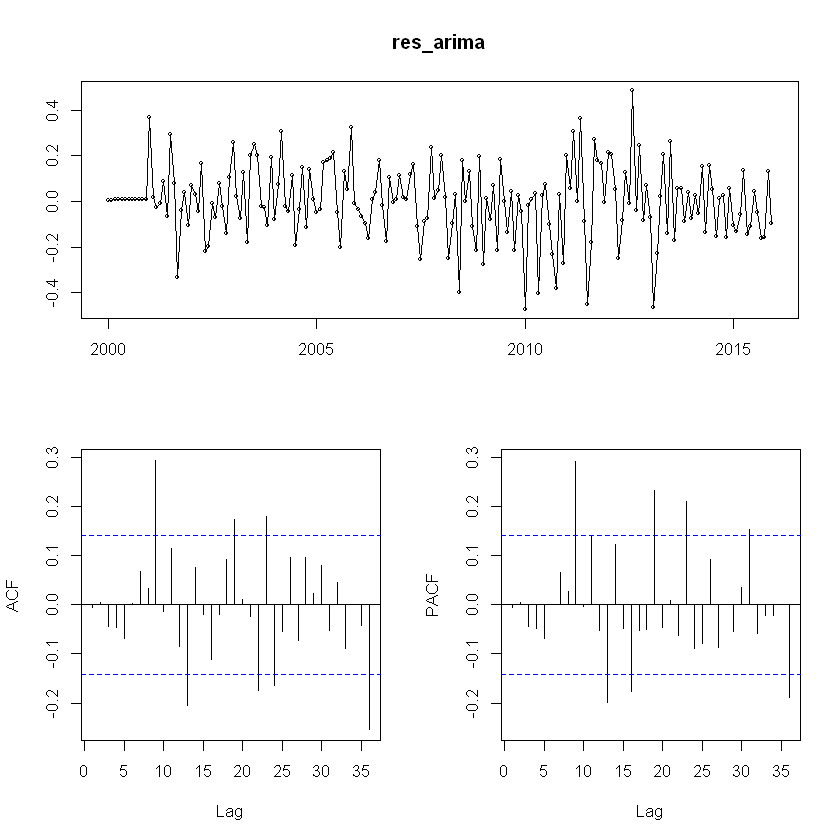

In [51]:
res_arima = residuals(fit_arima)
tsdisplay(res_arima)


	Ljung-Box test

data:  Residuals from ARIMA(3,0,0)(2,1,0)[12] with drift
Q* = 65.439, df = 18, p-value = 2.629e-07

Model df: 6.   Total lags used: 24



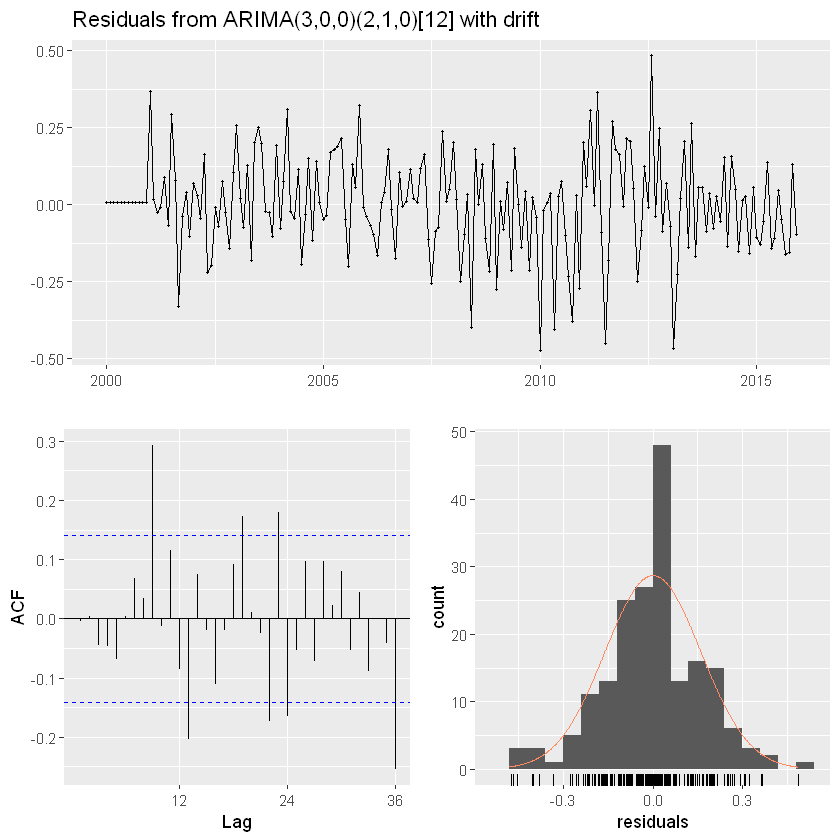

In [52]:
checkresiduals(fcast_arima)

In [53]:
LjungBox(res_arima, lags=seq(1,24,1), order=length(fit_arima$coef))

,lags,statistic,df,p-value
,1,0.004120306,0,NA
,2,0.007592953,0,NA
,3,0.390401978,0,NA
,4,0.822703325,0,NA
,5,1.756545794,0,NA
,6,1.759012107,0,0.000000e+00
,7,2.708029214,1,9.984427e-02
,8,2.937219592,2,2.302454e-01
,9,20.428689889,3,1.383272e-04
,10,20.462745827,4,4.045797e-04


**b) Manual Arima:**

In [54]:
# How many differentials do I need to get a stationary series?
ndiffs(Turnover_db)

# How many lags do I need to get a stationary series?
nsdiffs(Turnover_db)

[1] 1

[1] 1

In [55]:
training_set = window(diff(log(Turnover_db),lag=12), end=c(2015,12))
test_set = window(diff(log(Turnover_db),lag=12),start=c(2016,1))
fit_arima= Arima(training_set, order = c(12,1,3), seasonal=c(2,1,1), include.constant=FALSE)

In [ ]:
training_set = window(diff(log(Turnover_db),lag=12), end=c(2015,12))
test_set = window(diff(log(Turnover_db),lag=12),start=c(2016,1))
fit_arima= Arima(training_set, order = c(24,1,3), seasonal=c(3,1,1), include.constant=FALSE)

In [ ]:
fit_arima

In [ ]:
fcast_arima = forecast(fit_arima,h=60)
plot(fcast_arima)
lines(test_set, col="red")

In [ ]:
manual_arima = accuracy(fcast_arima,test_set)
manual_arima

In [ ]:
res_arima = fit_arima$residuals
tsdisplay(fit_arima$residuals)

In [ ]:
checkresiduals(fit_arima)

In [ ]:
LjungBox(res_arima, lags=seq(1,24,1), order=length(fit_arima$coef))

-----------------------------------------------------------------------------------------------------

## 8) Compare the different models in terms of residual diagnostics, model fit, and forecast accuracy. Analyse your results and select your final model.

In [ ]:
# Auto ARIMA: ARIMA(3,0,0)(2,1,0) with drift 
auto_arima

In [ ]:
# Manual ARIMA: ARIMA(12,2,3)(2,1,1)
manual_arima

**Even though both models are not following a white noise process, we can compara the results of the main cost function performance in order to understand which one is better vs the other. In this case, it seems that the manual ARIMA is presenting by far a lower MASE. Actually, comparing the MASE of the test set, the manual ARIMA presented the best performance among all run in this assignment.**

-----------------------------------------------------------------------------------------------------

## 9) Generate out of sample forecasts up to December 2020, based on the complete time series. Discuss your results.

In [ ]:
# Training my model
transformed_turnover = window(diff(log(Turnover_db),lag=12))
fit_arima= auto.arima(transformed_turnover, seasonal=TRUE, approximation=FALSE, stepwise=FALSE)

In [ ]:
summary(fit_arima)

In [ ]:
fcast_arima = forecast(fit_arima,h=11)
plot(fcast_arima)

In [ ]:
res_arima = fit_arima$residuals
tsdisplay(fit_arima$residuals)

In [ ]:
checkresiduals(fit_arima)

In [ ]:
LjungBox(res_arima, lags=seq(1,24,1), order=length(fit_arima$coef))

**According to the Ljung-Box test, with a 99% of confidence level we can reject our null hypothesis, which means that there is no white process in my forecast series. Considering the latter, we can say that the time series can be predicted, but we are able to improve our model.**

-----------------------------------------------------------------------------------------------------

## 10) In addition, generate the seasonally adjusted time series for the Turnover data. Estimate an (auto-)ARIMA model and an (auto-)ETS model for this non-seasonal time series. Compare the forecast accuracy and residual diagnostics of both models, and select the final model for the seasonally adjusted series. Generate out of sample forecasts up to December 2020, based on the complete time series.Discuss your results.

In [ ]:
# Multiplicative process
Turnover_multiplicative = decompose(Turnover_db, type="multiplicative")

In [ ]:
# Seasonally adjusted
Seasonally_adjusted = seasadj(Turnover_multiplicative)

In [ ]:
# Plotting the seasonally adjusted serie
plot(Turnover_db, col='gray', ylab='Turnover', main='Turnover Index')
lines(Seasonally_adjusted, col='red')

In [ ]:
# ADF test of the seasonal adjusted serie
adf.test(Seasonally_adjusted, alternative='stationary')

**Considering the high level of p-value, we should not reject the hypothesis null; therefore, this is not a stationary series.**

**a) Auto ARIMA:**

In [ ]:
# Training my model
training_set = window(Seasonally_adjusted, end=c(2015,12))
test_set = window(Seasonally_adjusted,start=c(2016,1))
fit_arima= auto.arima(training_set, seasonal=TRUE, approximation=FALSE, stepwise=FALSE, lambda=lambda_bc)

In [ ]:
summary(fit_arima)

In [ ]:
fcast_arima = forecast(fit_arima,h=60)
plot(fcast_arima)
lines(test_set, col="red")

In [ ]:
auto_arima = accuracy(fcast_arima,test_set)
auto_arima

In [ ]:
res_arima = residuals(fit_arima)
tsdisplay(res_arima)

In [ ]:
checkresiduals(fcast_arima)

In [ ]:
LjungBox(res_arima, lags=seq(1,24,1), order=length(fit_arima$coef))

**b) Auto ETS:**

In [ ]:
# Training my model
training_set = window(Seasonally_adjusted, end=c(2015,12))
test_set = window(Seasonally_adjusted,start=c(2016,1))
fit_ets = ets(training_set, lambda=lambda_bc)

In [ ]:
summary(fit_ets)

In [ ]:
fcast_ets = forecast(fit_ets,h=60)
plot(fcast_ets)
lines(test_set, col="red")

In [ ]:
accuracy(fcast_ets,test_set)

In [ ]:
res_ets = residuals(fit_ets)
tsdisplay(res_ets)

In [ ]:
checkresiduals(fit_ets)

In [ ]:
LjungBox(res_ets, lags=seq(1,24,1), order=length(fit_ets$coef))

**Between the Auto ARIMA and the Auto ETS, we should select the Auto ETS because it presents a lower MASE level.**

-----------------------------------------------------------------------------------------------------

# EXERCISE 2

For this exercise, find a recent and relevant time series to forecast, using the techniques
that have been discussed during the lectures. In your analysis, set up a carefully
selected forecasting process, taking data considerations and implementation issues
into account. Describe your approach, and motivate your choices.
The data set should be original (not from R packages), recent, sufficiently long and
must include a seasonal component. The data should be analyzed using at least two
techniques, and results should be compared.

**We are going to work with the Mexican Monthly inflation series (from Jan-2000 to Mar-2020), which comes from the official institute (INEGI).**

**a) Importing the dataset:**

In [ ]:
# Importing my file
inflation = read.table("inflation - INEGI.csv", sep=",", head=TRUE)

In [ ]:
# Selecting Turnover database
inflation_db = ts(inflation, frequency = 12, start = 2000)
inflation_db = inflation_db[,2]

**b) Descriptive Analytics:**

In [ ]:
# Plotting the original data
plot(inflation_db, main = 'Monthly Inflation - Mexico 2000-2020', ylab = '% Monthly Inflation')

In [ ]:
# Avg turnover by month
monthplot(inflation_db, type="l", main="Seasonal subseries plot: Monthly Inflation", ylab="Monthly Inflation", xlab="Month", xaxt="n")
axis(1,at=1:12, labels=month.abb, cex=1)

In [ ]:
# Auto-correlation function and Partial Auto-correlation function
tsdisplay(inflation_db)

In [ ]:
# Augmented Dicky-Fuller Test
adf.test(inflation_db, alternative = "stationary")

**We could describe this time series as a serie that presents seasonality and stationarity, perhaps with a slightly decreasing across time.**

In [ ]:
# Searching the optimal lambda
lambda_bc2 = BoxCox.lambda(inflation_db)
lambda_bc2

**c) STL Decomposition:**

In [ ]:
# Additive decomposition process
inflation_stl_additive = decompose(inflation_db, type="additive")
plot(inflation_stl_additive)

In [ ]:
# Seasonal adjustment with seasonal adjustment
seasAdj = seasadj(inflation_stl_additive)
plot(inflation_db,col="gray", main="Trend-Cycle Components of the Monthly Inflation with seasonal adj", ylab="Monthly Inflation")
lines(seasAdj, col='red')

In [ ]:
# Random walk with drift forecasts of the seasonally adjusted data
fit = stl(inflation_db, s.window="periodic")
fcast = forecast(fit, method="rwdrift", h=24)

# Fitting the model
pl_adj = seasadj(fit)
rwf_adj = rwf(pl_adj, h=24, drift = TRUE, lambda=1)
plot(rwf_adj)

# Original data
lines(inflation_db, col="red")

# Mean of the forecast
lines(fcast$mean, col="green")

In [ ]:
# Dividing the dataset and fitting the training set
training_set = window(pl_adj, end=c(2015,12))
test_set = window(pl_adj,start=c(2016,1))
fit_stl = rwf(training_set, h=length(test_set), drift = TRUE, lambda=1)

# Cost function of training and test set
accuracy(fit_stl,test_set)

In [ ]:
checkresiduals(fit_stl)

**c) ETS Modeling:**

In [ ]:
# Training and Test set
training_set = window(inflation_db, end=c(2015,12))
test_set = window(inflation_db,start=c(2016,1))

In [ ]:
# Declaring empty matrix
matrix_ets2 = matrix(data=NA, nrow=4, ncol=2)

In [ ]:
# Building ETS models with Damped = TRUE
models_ets2 = models_ets[1:4] 

for (i in 1:4){
    model = ets(training_set, model=models_ets2[i])
    fcast = forecast(model,h=length(test_set))
    accuracy = accuracy(fcast, test_set)
    matrix_ets2[i,1] = model$aicc
    matrix_ets2[i,2] = accuracy[2,6]
}

rownames(matrix_ets2) = models_ets2
colnames(matrix_ets2) = c("AICc","MASE")

In [ ]:
matrix_ets2

In [ ]:
# Presenting the winner model: ANA
fit_ana = ets(training_set, model=models_ets2[3], damped=FALSE)
fit_ana

In [ ]:
# Plotting the winner model
fcast_ana = forecast(fit_ana,h=60)
plot(fcast_ana)
lines(test_set, col="red")

In [ ]:
# Accuracy of the ANA model
accuracy(fcast_ana,test_set)

In [ ]:
# Residuals of the ANA model
res_ana = residuals(fit_ana)
tsdisplay(res_ana)

In [ ]:
# Ljung-Box of the ANA model
checkresiduals(fit_ana)

In [ ]:
# Ljung-Box of the ANA model
LjungBox(res_ana, lags=seq(1,24,1), order=length(fit_ana$coef))

**d) ARIMA:**

In [ ]:
# How many differentials do I need to get a stationary series?
ndiffs(inflation_db)

# How many lags do I need to get a stationary series?
nsdiffs(inflation_db)

In [ ]:
# Presenting the ACF and the PACF
tsdisplay(inflation_db)

In [ ]:
# Auto ARIMA
training_set = window(inflation_db, end=c(2015,12))
test_set = window(inflation_db,start=c(2016,1))
fit_arima2 = auto.arima(training_set, seasonal=TRUE, approximation=FALSE, stepwise=FALSE, lambda=1)
fcast_arima2 = forecast(fit_arima2,h=60)
fit_arima2

In [ ]:
auto_arima2 = accuracy(fcast_arima2,test_set)
auto_arima2

In [ ]:
checkresiduals(fcast_arima2)

**e) Conclusions:**

**The ETS and ARIMA model brought test set MASE below zero, which tells us that these are good models. Moreover, the gap between the cost function metrics of the training and test set are not too big, which tells us that there is no overfittig. Comparing the MASE, we could say that the ETS model is the best one; however, it did fail in having white noise (Ljung-Box). In the other hand, the auto ARIMA model presented a similar MASE, but with a white noise process. For this reason, I would choose the ARIMA model because the residuals are closer to the model's assumptions (normal distribution).**